In [1]:
%pylab inline
%reload_ext autoreload
%autoreload 2

import astropy.table as astable
import fitsio

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
# Prepare a halo
src_halo = astable.Table()
src_halo["index"] = np.array([1, 2])
src_halo["mass"] = np.array([3e14, 8e14])
src_halo["conc"] = np.array([6.0, 4.0])
src_halo["z_lens"] = np.array([0.2, 0.52])

In [3]:
config_fname = "./config.ini"
from xlens.simulation.simulator.base import SimulateImageHalo

simulator = SimulateImageHalo(config_fname)
simulator.run(ifield=1, src_halo=src_halo[0])

Simulating for field: 1, and halo index 1
Simulation has galaxies: 1459


In [4]:
from xlens.simulation.measure import ProcessSimFpfs

processor = ProcessSimFpfs(config_fname)
image_fname = "./sim/image-00001_nfw-001_rot0_i.fits"
data = processor.prepare_data(image_fname)

from astropy.visualization import simple_norm

gal_array = data["gal_array"]

reading r band
Using noisy setup with std: 0.37
The random seed is 6393
Simulated noise STD is: 0.37
The final noise variance is 0.37


In [5]:
import anacal

fpfs_config = anacal.fpfs.FpfsConfig(
    sigma_arcsec=0.52,
)
pixel_scale = 0.2
noise_variance = 0.37
out = anacal.fpfs.process_image(
    fpfs_config=fpfs_config,
    gal_array=data["gal_array"],
    psf_array=data["psf_array"],
    pixel_scale=pixel_scale,
    noise_variance=noise_variance,
    noise_array=data["noise_array"],
)

out.dtype.names

('y',
 'x',
 'is_peak',
 'mask_value',
 'e1',
 'e1_g1',
 'e2',
 'e2_g2',
 'w',
 'w_g1',
 'w_g2',
 'flux',
 'mask')

[]

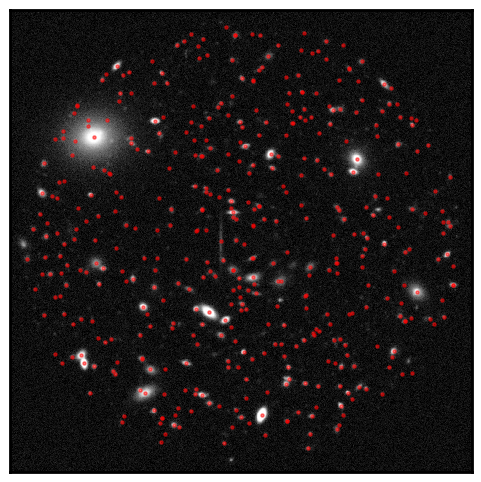

In [6]:
plt.close()
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.scatter(out["x"], out["y"], marker="o", alpha=0.5, s=5.0, color="red")
ax.imshow(
    gal_array,
    aspect="equal",
    cmap="Greys_r",
    origin="lower",
    interpolation="None",
    norm=simple_norm(gal_array, "asinh", asinh_a=0.2, min_cut=-0.6, max_cut=25),
)
ax.set_xticks([])
ax.set_yticks([])
ax.set_xticklabels([])
ax.set_yticklabels([])